<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#4.-신경망" data-toc-modified-id="4.-신경망-1">4. 신경망</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#4.2.1-평균-제곱-오차" data-toc-modified-id="4.2.1-평균-제곱-오차-1.0.1">4.2.1 평균 제곱 오차</a></span></li><li><span><a href="#4.2.2-교차-엔트로피-오차" data-toc-modified-id="4.2.2-교차-엔트로피-오차-1.0.2">4.2.2 교차 엔트로피 오차</a></span></li><li><span><a href="#4.2.3-미니배치-학습" data-toc-modified-id="4.2.3-미니배치-학습-1.0.3">4.2.3 미니배치 학습</a></span></li><li><span><a href="#4.2.4-(배치용)-교차-엔트로피-오차-구현하기" data-toc-modified-id="4.2.4-(배치용)-교차-엔트로피-오차-구현하기-1.0.4">4.2.4 (배치용) 교차 엔트로피 오차 구현하기</a></span></li></ul></li><li><span><a href="#4.3-수치-미분" data-toc-modified-id="4.3-수치-미분-1.1">4.3 수치 미분</a></span><ul class="toc-item"><li><span><a href="#4.3.1-미분" data-toc-modified-id="4.3.1-미분-1.1.1">4.3.1 미분</a></span></li><li><span><a href="#4.3.2-수치-미분의-예" data-toc-modified-id="4.3.2-수치-미분의-예-1.1.2">4.3.2 수치 미분의 예</a></span></li><li><span><a href="#4.3.3-편미분" data-toc-modified-id="4.3.3-편미분-1.1.3">4.3.3 편미분</a></span></li></ul></li><li><span><a href="#4.4-기울기" data-toc-modified-id="4.4-기울기-1.2">4.4 기울기</a></span><ul class="toc-item"><li><span><a href="#4.4.1-경사법(경사-하강법)" data-toc-modified-id="4.4.1-경사법(경사-하강법)-1.2.1">4.4.1 경사법(경사 하강법)</a></span></li><li><span><a href="#신경망에서의-기울기" data-toc-modified-id="신경망에서의-기울기-1.2.2">신경망에서의 기울기</a></span></li></ul></li><li><span><a href="#4.5-학습-알고리즘-구현하기" data-toc-modified-id="4.5-학습-알고리즘-구현하기-1.3">4.5 학습 알고리즘 구현하기</a></span><ul class="toc-item"><li><span><a href="#4.5.1-2층-신경망-클래스-구현하기" data-toc-modified-id="4.5.1-2층-신경망-클래스-구현하기-1.3.1">4.5.1 2층 신경망 클래스 구현하기</a></span></li><li><span><a href="#4.5.2-미니배치-학습-구현하기" data-toc-modified-id="4.5.2-미니배치-학습-구현하기-1.3.2">4.5.2 미니배치 학습 구현하기</a></span></li><li><span><a href="#4.5.3-시험-데이터로-평가하기" data-toc-modified-id="4.5.3-시험-데이터로-평가하기-1.3.3">4.5.3 시험 데이터로 평가하기</a></span></li></ul></li></ul></li></ul></div>

# 4. 신경망

### 4.2.1 평균 제곱 오차

$$
E= {1\over2}\sum_{k}^{}(y_k-t_k)^2
$$

In [5]:
import numpy as np

In [1]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [2]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [6]:
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

### 4.2.2 교차 엔트로피 오차

$$
E= -\sum_{k}^{}t_klogy_k
$$

In [7]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [9]:
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

### 4.2.3 미니배치 학습

In [11]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) # (60000, 784)
print(t_train.shape) # (10000, 784)

(60000, 784)
(60000, 10)


In [12]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [13]:
np.random.choice(60000, 10)

array([13730, 53736,  9437,  3069, 28743, 27861, 22630, 43287, 12175,
       25550])

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [14]:
def cross_entropy_error(y, t):
    if y.ndim==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
        batch_size = y.shape[0]
        return -np.sum(t*np.log(y)) / batch_size

In [15]:
def cross_entropy_error(y, t):
    if y.dim ==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
        batch_size = y.shape[0]
        return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

## 4.3 수치 미분

### 4.3.1 미분

In [16]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

In [17]:
np.float32(1e-50)

0.0

In [18]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / 2*h

### 4.3.2 수치 미분의 예

$$
y = 0.01x^2 + 0.1x
$$

In [22]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

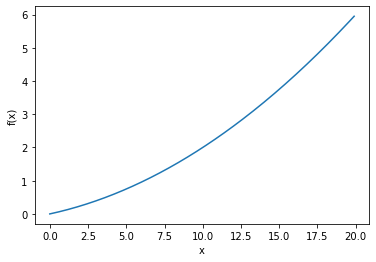

In [23]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [24]:
numerical_diff(function_1, 5)

1.9999999999908982e-09

In [25]:
numerical_diff(function_1, 10)

2.999999999986347e-09

### 4.3.3 편미분

$$
f(x_0, x_1)=x_0^2+x_1^2
$$

In [41]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [27]:
# 문제1 x0=3 x1=4일 때, x0에 대한 편미분을 구하라.

def function_tmp1(x0):
    return x0*x0+4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.000000000003781e-08

In [28]:
# 문제1 x0=3 x1=4일 때, x1에 대한 편미분을 구하라.

def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119e-08

## 4.4 기울기

In [57]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [58]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [59]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [60]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

### 4.4.1 경사법(경사 하강법)

In [62]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [63]:
def function_2(x):
    return x[0]**2 + x[1] **2

In [64]:
init_x = np.array([-3.0, 4.0])

In [65]:
gradient_descent(function_2, init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [67]:
# 학습률이 너무 큰 예 : lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [68]:
# 학습률이 너무 작은 예 : lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

### 신경망에서의 기울기

In [72]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [73]:
net = simpleNet()
print(net.W) # 가중치 매개변수

[[ 0.38986226 -1.0129872   0.06510871]
 [-2.233992   -0.32398479 -1.54244287]]


In [74]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-1.77667544 -0.89937863 -1.34913336]


In [75]:
np.argmax(p) # 최대값의 인덱스

1

In [76]:
t = np.array([0,0,1]) # 정답 레이블
net.loss(x, t)

1.169392691392813

In [77]:
def f(W):
    return net.loss(x,t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.12150972  0.29215692 -0.41366663]
 [ 0.18226458  0.43823538 -0.62049995]]


In [78]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

## 4.5 학습 알고리즘 구현하기

### 4.5.1 2층 신경망 클래스 구현하기

In [90]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.random.randn(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.random.randn(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W : self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [91]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape) # (784,100)
print(net.params['b1'].shape) # (100,)
print(net.params['W2'].shape) # (100, 10)
print(net.params['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


In [92]:
x = np.random.rand(100, 784) # 더미 입력 데이터
y = net.predict(x)

In [94]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t) # 기울기 계산

print(grads['W1'].shape) # (784, 100)
print(grads['b1'].shape) # (100,)
print(grads['W2'].shape) # (100, 10)
print(grads['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


### 4.5.2 미니배치 학습 구현하기

In [100]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미내배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_size]
    t_batch = t_train[batch_size]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

### 4.5.3 시험 데이터로 평가하기

In [106]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []
# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

# 하이퍼파라미터
iters_num = 10000
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.78545, 0.793
train acc, test acc | 0.8794166666666666, 0.8836
train acc, test acc | 0.8993666666666666, 0.8987
train acc, test acc | 0.90865, 0.9105
train acc, test acc | 0.9149333333333334, 0.9155
train acc, test acc | 0.9204333333333333, 0.9213
train acc, test acc | 0.92455, 0.9252
train acc, test acc | 0.9286833333333333, 0.9282
train acc, test acc | 0.93125, 0.9297
train acc, test acc | 0.93395, 0.9331
train acc, test acc | 0.93625, 0.9355
train acc, test acc | 0.9387666666666666, 0.9378
train acc, test acc | 0.9408666666666666, 0.9386
train acc, test acc | 0.9426, 0.9422
train acc, test acc | 0.9451833333333334, 0.9425
train acc, test acc | 0.9462333333333334, 0.9449
